In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud

# We need cufflinks to link plotly to pandas and add the iplot method
import cufflinks as cf
cf.go_offline() 

from wordcloud import WordCloud

In [4]:
movie = pd.read_csv("IMDb movies.csv", low_memory = False)

In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

### Data Wrangling 

In [6]:
#movie_n = data.drop(data.columns.difference(['imdb_title_id', 'title', 'date_published', 'year', 'genre', 'duration', 'country', 'director', 'votes', 'language']), axis = 1)
cols = ['imdb_title_id', 'title', 'date_published', 'year', 'genre', 'duration', 'country', 'director', 'votes', 'language']
movie_n = movie[cols].copy()
movie_n.head()

,imdb_title_id,title,date_published,year,genre,duration,country,director,votes,language
0,tt0000009,Miss Jerry,1894-10-09,1894,Romance,45,USA,Alexander Black,154,None
1,tt0000574,The Story of the Kelly Gang,1906-12-26,1906,"Biography, Crime, Drama",70,Australia,Charles Tait,589,None
2,tt0001892,Den sorte drøm,1911-08-19,1911,Drama,53,"Germany, Denmark",Urban Gad,188,NaN
3,tt0002101,Cleopatra,1912-11-13,1912,"Drama, History",100,USA,Charles L. Gaskill,446,English
4,tt0002130,L'Inferno,1911-03-06,1911,"Adventure, Drama, Fantasy",68,Italy,"Francesco Bertolini, Adolfo Padovan",2237,Italian


In [7]:
movie_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   imdb_title_id   85855 non-null  object
 1   title           85855 non-null  object
 2   date_published  85855 non-null  object
 3   year            85855 non-null  object
 4   genre           85855 non-null  object
 5   duration        85855 non-null  int64 
 6   country         85791 non-null  object
 7   director        85768 non-null  object
 8   votes           85855 non-null  int64 
 9   language        85022 non-null  object
dtypes: int64(2), object(8)
memory usage: 6.6+ MB


In [8]:
movie_n.shape

(85855, 10)

In [9]:
movie_n.isna().sum()

imdb_title_id       0
title               0
date_published      0
year                0
genre               0
duration            0
country            64
director           87
votes               0
language          833
dtype: int64

In [10]:
movie_n = movie_n.dropna()

In [11]:
movie_n.isna().sum()

imdb_title_id     0
title             0
date_published    0
year              0
genre             0
duration          0
country           0
director          0
votes             0
language          0
dtype: int64

In [12]:
len(movie_n)

84908

In [13]:
for col in movie_n.columns:
    if movie_n[col].dtypes == 'object':
        print(col + ': ')
        print(movie_n[col].unique(),'\n')

imdb_title_id: 
['tt0000009' 'tt0000574' 'tt0002101' ... 'tt9911774' 'tt9914286'
 'tt9914942'] 

title: 
['Miss Jerry' 'The Story of the Kelly Gang' 'Cleopatra' ...
 'Padmavyuhathile Abhimanyu' 'Sokagin Çocuklari'
 'La vida sense la Sara Amat'] 

date_published: 
['1894-10-09' '1906-12-26' '1912-11-13' ... '2020-10-22' '2019-01-13'
 '2020-09-04'] 

year: 
['1894' '1906' '1912' '1911' '1919' '1913' '1914' '1915' '1916' '1917'
 '1918' '1920' '1921' '1924' '1922' '1923' '1925' '1926' '1935' '1927'
 '1928' '1983' '1929' '1930' '1931' '1932' '1937' '1938' '1933' '1934'
 '1936' '1940' '1939' '1942' '1943' '1941' '1948' '1944' '2001' '1946'
 '1945' '1947' '1973' '1949' '1950' '1952' '1951' '1962' '1953' '1954'
 '1955' '1961' '1956' '1958' '1957' '1959' '1960' '1963' '1965' '1971'
 '1964' '1966' '1968' '1967' '1969' '1976' '1970' '1979' '1972' '1981'
 '1978' '2000' '1989' '1975' '1974' '1986' '1990' '2018' '1977' '1982'
 '1980' '1993' '1984' '1985' '1988' '1987' '2005' '1991' '2002' '1994'
 '1

In [14]:
movie_n = movie_n[movie_n['language'] != 'None']

In [15]:
len(movie_n)

84840

In [16]:
movie_n['year'] = movie_n['year'].str.replace('TV Movie 2019','2019')

In [17]:
movie_n['year'].unique()

array(['1912', '1911', '1919', '1913', '1914', '1915', '1916', '1917',
       '1918', '1920', '1921', '1924', '1922', '1923', '1925', '1926',
       '1935', '1927', '1928', '1983', '1929', '1930', '1931', '1932',
       '1937', '1938', '1933', '1934', '1936', '1940', '1939', '1942',
       '1943', '1941', '1948', '1944', '2001', '1946', '1945', '1947',
       '1973', '1949', '1950', '1952', '1951', '1962', '1953', '1954',
       '1955', '1961', '1956', '1958', '1957', '1959', '1960', '1963',
       '1965', '1971', '1964', '1966', '1968', '1967', '1969', '1976',
       '1970', '1979', '1972', '1981', '1978', '2000', '1989', '1975',
       '1974', '1986', '1990', '2018', '1977', '1982', '1980', '1993',
       '1984', '1985', '1988', '1987', '2005', '1991', '2002', '1994',
       '1992', '1995', '2017', '1997', '1996', '2006', '1999', '1998',
       '2007', '2008', '2003', '2004', '2010', '2009', '2011', '2013',
       '2012', '2016', '2015', '2014', '2019', '2020'], dtype=object)

In [18]:
movie_n = movie_n[movie_n['date_published'] != 'TV Movie 2019']

In [19]:
#regex = '([12]\d{3}-(0[1-9]|1[0-2])-(0[1-9]|[12]\d|3[01]))' #yy-mm-dd
movie_n['date_published'].str.contains(r'([12]\d{3}-(0[1-9]|1[0-2])-(0[1-9]|[12]\d|3[01]))').tolist()

C:\Users\K I N G\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



[True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 Tr

In [20]:
movie_n = movie_n.iloc[movie_n['date_published'].str.contains(r'([12]\d{3}-(0[1-9]|1[0-2])-(0[1-9]|[12]\d|3[01]))').tolist()]

In [21]:
len(movie_n)

80359

In [22]:
movie_n['date_published'] = pd.to_datetime(movie_n['date_published'])

In [23]:
movie_n['year'] = pd.to_numeric(movie_n['year'])

In [24]:
movie_n.isna().sum()

imdb_title_id     0
title             0
date_published    0
year              0
genre             0
duration          0
country           0
director          0
votes             0
language          0
dtype: int64

In [25]:
for col in movie_n.columns:
    if movie_n[col].dtypes == 'object':
        print(col + ': ')
        print(len(movie_n[movie_n[col] == 'None']),'\n')

imdb_title_id: 
0 

title: 
0 

genre: 
0 

country: 
0 

director: 
0 

language: 
0 



In [26]:
movie_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80359 entries, 3 to 85854
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   imdb_title_id   80359 non-null  object        
 1   title           80359 non-null  object        
 2   date_published  80359 non-null  datetime64[ns]
 3   year            80359 non-null  int64         
 4   genre           80359 non-null  object        
 5   duration        80359 non-null  int64         
 6   country         80359 non-null  object        
 7   director        80359 non-null  object        
 8   votes           80359 non-null  int64         
 9   language        80359 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 6.7+ MB


In [27]:
movie_n['genre'] = movie_n['genre'].str.replace(' ','')
movie_n['language'] = movie_n['language'].str.replace(' ','')

In [28]:
movie_n.to_csv("IMDb cleaned data.csv", index=False)

### Data Visualization

In [29]:
data = pd.read_csv("IMDb cleaned data.csv")

In [30]:
data

,imdb_title_id,title,date_published,year,genre,duration,country,director,votes,language
0,tt0002101,Cleopatra,1912-11-13,1912,"Drama,History",100,USA,Charles L. Gaskill,446,English
1,tt0002130,L'Inferno,1911-03-06,1911,"Adventure,Drama,Fantasy",68,Italy,"Francesco Bertolini, Adolfo Padovan",2237,Italian
2,tt0002423,Madame DuBarry,1919-11-26,1919,"Biography,Drama,Romance",85,Germany,Ernst Lubitsch,753,German
3,tt0002445,Quo Vadis?,1913-03-01,1913,"Drama,History",120,Italy,Enrico Guazzoni,273,Italian
4,tt0002461,Richard III,1912-10-15,1912,Drama,55,"France, USA","André Calmettes, James Keane",225,English
...,...,...,...,...,...,...,...,...,...,...
80354,tt9908390,Le lion,2020-01-29,2020,Comedy,95,"France, Belgium",Ludovic Colbeau-Justin,398,French
80355,tt9911196,De Beentjes van Sint-Hildegard,2020-02-13,2020,"Comedy,Drama",103,Netherlands,Johan Nijenhuis,724,"German,Dutch"
80356,tt9911774,Padmavyuhathile Abhimanyu,2019-03-08,2019,Drama,130,India,Vineesh Aaradya,265,Malayalam
80357,tt9914286,Sokagin Çocuklari,2019-03-15,2019,"Drama,Family",98,Turkey,Ahmet Faik Akinci,194,Turkish


In [31]:
language = data['language'].str.cat(sep = ',')
Graph_1 = pd.Series(language.split(','))

Graph_1.value_counts()[:20].iplot(kind='bar')

In [32]:
gener = data['genre'].str.cat(sep = ',')
Graph_2 = pd.Series(gener.split(','))

Graph_2.value_counts()[:20].iplot(kind='bar')

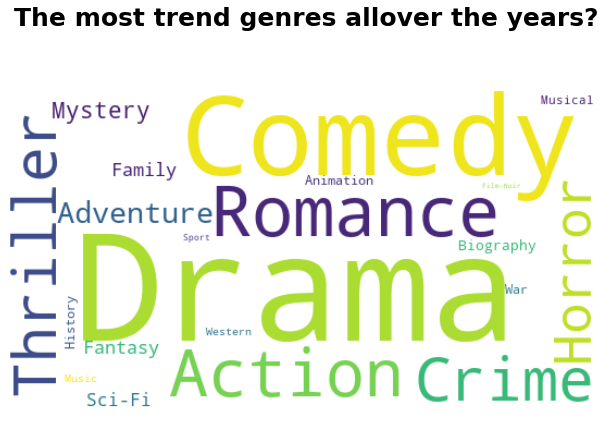

In [34]:
frame = Graph_2.value_counts().rename_axis('Genres').reset_index(name='Frequency')
words = dict()

for i in range(25): #genres length
    words[frame["Genres"][i]] = frame["Frequency"][i]    #{'Drama': 44320, ... }

tone = 100 # define the color of the words

f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='white', 
                      max_words=25,relative_scaling=0.7,
                      normalize_plurals=False)

wordcloud.generate_from_frequencies(words)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The most trend genres allover the years?', fontsize=25,y=1.18,fontweight="bold")
plt.show()

In [33]:
df = data.sort_values(by='votes', ascending=True)


fig = px.bar(df.tail(50), x="votes", y="title", height=600, width=1000, color='votes') 
#color_continuous_scale = px.colors.sequential.thermal_r
fig.show()

In [35]:
G3 = df['director'].value_counts().rename_axis('Directors').reset_index(name='Number of Movies').head(10)

fig = px.bar(G3, x="Number of Movies", y="Directors", height=600, width=1000, color='Directors',
             color_continuous_scale = px.colors.sequential.ice_r)
fig.show()